<a href="https://colab.research.google.com/github/sahayshashank/pytorch/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [5]:
t = torch.zeros(2,3)
t

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [7]:
# Create a model
class Model(nn.Module):
  # For IRIS dataset
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [9]:
torch.manual_seed(241)
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [11]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
X = df.drop('variety', axis = 1)
y = df['variety']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=6)

In [26]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [29]:
#set criterion (loss function)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
epochs = 500
losses = []
#Training
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i%50 == 0:
    print(f'epoch {i} : loss is {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 : loss is 0.39101549983024597
epoch 50 : loss is 0.16204993426799774
epoch 100 : loss is 0.09987778961658478
epoch 150 : loss is 0.07781895250082016
epoch 200 : loss is 0.06703927367925644
epoch 250 : loss is 0.06080891191959381
epoch 300 : loss is 0.05681709945201874
epoch 350 : loss is 0.054083921015262604
epoch 400 : loss is 0.052107349038124084
epoch 450 : loss is 0.050637852400541306


Text(0, 0.5, 'loss')

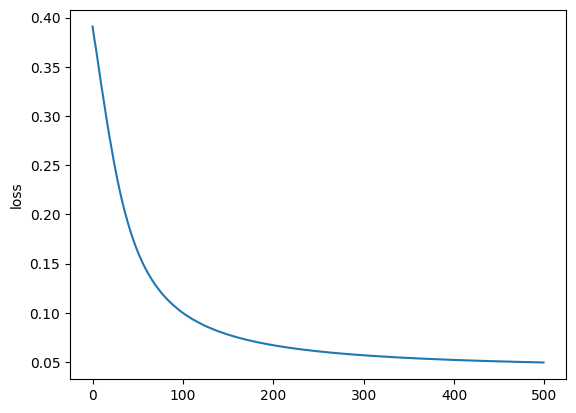

In [35]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")

In [36]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)